### Riccardo Cusinato - 3627460
### Giacomo Barzon - 3626438
### Damiano Sgarbossa - 3623971  

# Random numbers and Monte Carlo integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

# 11.1. Pitfalls of pseudo-random number generation

The recursion relation of RANDU is defined by:
$$ I_{i+1} = (65539 I_i) \ mod \ 2^{31} $$
and needs to be started from an odd integer. The obtained integer values can be mapped to pseudo-random floating point numbers $u_i \in [0,1]$ through:
$$ u_i = \dfrac{I_i}{2^{31}} $$
<br>
a) Implement this number generator. <br>
b) Now generate 2-tuples of successive random numbers from the sequence generated by the generator. Generate 1000 points and make a scatter plot of the points in the unit square. Does this look unusual? <br>
c) Now zoom in by a large factor onto a small region of the square, for example [0.2, 0.201] × [0.3, 0.301], and generate enough points that there are again 1000 points within the small region as before. Interpret the result. <br>
d) Repeat the above for your favorite standard random number generator. <br>

In [2]:
# define RANDU random generator
# I: starting number of the succession
# N: total number of generated points
def RANDU (I,N):
    II = np.zeros(N)
    if I%2 != 1 :
        print('Error: use an odd number')
        return 0
    for i in range(N):
        I = np.mod(65539*I,2**31, dtype=int)
        II[i] =  I
    return II/2**31

In [3]:
# generate 2 tuples of successive random numbers
I = 1
N = 2000
xy = RANDU(I,N).reshape((int(N/2),2))
XY = np.random.uniform(size=N).reshape((int(N/2),2))

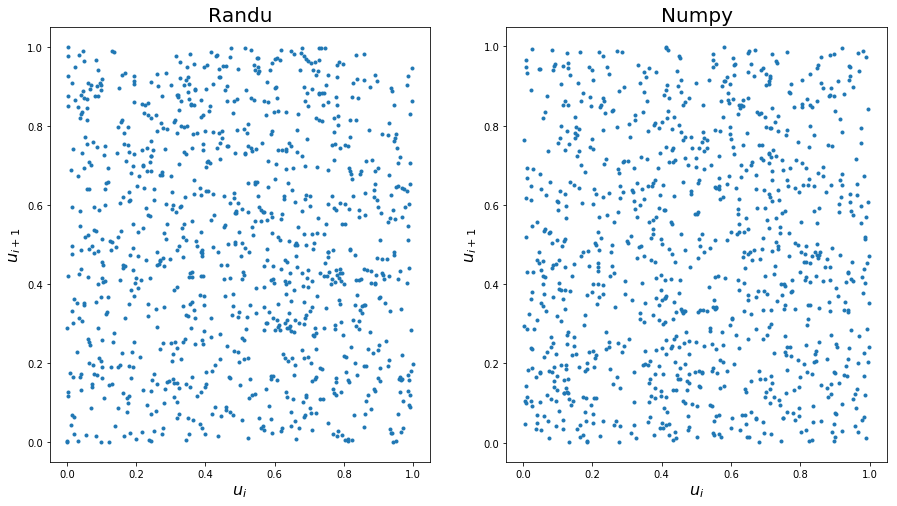

In [4]:
fig = plt.subplots(figsize=[15,8])

# plot RANDU generated points
plt.subplot(1,2,1)
plt.plot(xy[:,0],xy[:,1],'.')
plt.xlabel(r'$u_i$', fontsize=16)
plt.ylabel(r'$u_{i+1}$', fontsize=16)
plt.title('Randu', fontsize=20)
#plt.xlim(0.2,0.201)
#plt.ylim(0.3,0.301)

# plot numpy generated points
plt.subplot(1,2,2)
plt.plot(XY[:,0],XY[:,1],'.')
plt.xlabel(r'$u_i$', fontsize=16)
plt.ylabel(r'$u_{i+1}$', fontsize=16)
plt.title('Numpy', fontsize=20)
#plt.xlim(0.2,0.201)
#plt.ylim(0.3,0.301)
plt.show(fig)

Here it's pretty difficult to see that the points are distributed along lines, also zooming in some regions is ineffective. So we decided to make a 3D plot to see better the distribution of points along planes as we can see in the following plot.

In [5]:
# generate 3 tuples of successive random numbers
I = 1
N = 300000
xyz = RANDU(I,N).reshape((int(N/3),3))

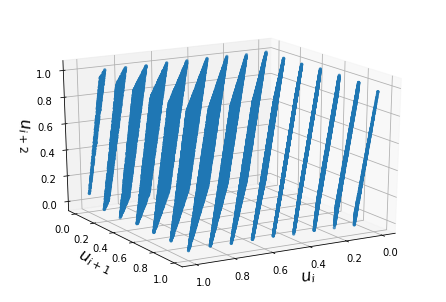

In [13]:
# 3D plot RANDU generated points

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = ax = Axes3D(fig)

ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], marker='.')

ax.set_xlabel(r'$u_i$', fontsize=16)
ax.set_ylabel(r'$u_{i+1}$', fontsize=16)
ax.set_zlabel(r'$u_{i+2}$', fontsize=16)

for angle in range(0,360):
    ax.view_init(elev=20, azim=60)

plt.show()

# 11.2 Performance of Monte Carlo integration in different dimensions

Consider the integral:
$$ I = \int_V f(\vec x) d^d \vec x $$
where the integration domain V is a d-dimensional hypercube with 0 ≤ $x_i$ ≤ 1 for each component of the vector $\vec x = (x_1, x_2, . . . , x_d)$ and the function we want to integrate is given by:
$$ f(\vec x) = \prod_{i=1}^{d} \dfrac{3}{2}(1 - x_i^2)  $$
This has an analytic solution of course, which is I = 1 independent of d, but we want to ignore this for the moment and use the problem as a test of the relative performance of Monte Carlo integration and ordinary integration techniques. <br> <br>
To this end, calculate the integral in dimensions d = 1, 2, 3, . . . , 10, using: <br>
a) the midpoint method, where you divide the volume into a set of much smaller hypercubes obtained by subdividing each axis into n intervals, and where you approximate the integral by evaluating the function at the centers of the small cubes <br>
b) standard Monte Carlo integration in d dimensions, using N random vectors <br> <br>
For definiteness, adopt n = 6 and N = 20000. For both of the methods, report the numerical result for I and the CPU-time needed for each of the dimensions d = 1, 2, . . . , 10

In [7]:
# define the hypercube side
a = 0.
b = 1.

# define integrating function
def f(x):
    return np.prod( 1.5*(1.-x**2), axis=0 )

# define true result
I0 = 1.

# define dimensions' range
ds = np.arange(1,11)

### a) midpoint method

In [8]:
# define number of intervals for each axis
n = 6

# side of each volumes
l = (b-a) / n

# compute extremes of intervals
x = np.arange(n+1)

# compute center of each interval
cs = ( x[1:] + x[:-1] ) / 2.

# define integral for input dimensions
def midpoint(d):
    print('Dimensions: ', d)
    print('total number of integration points: ', n**d)
    
    start = time.time()
    
    # define grid of integrating points
    x = np.meshgrid( *(cs for _ in range(d)) )
    x = np.array(x).reshape((d,-1)) * l
    
    # compute integral
    I = l**d * np.sum(f(x))
    
    # compute CPU time
    stop = time.time()
    CPUtime = (stop - start) * 1e3
    
    print('CPU time: {:.1f} ms'.format(CPUtime))
    print('CPU time per integration points: {:.2f} ns'.format(CPUtime / n**d * 1e3) )
    print('I = {:.3f}'.format(I))
    print('Relative error: {:.3f} \n'.format( (I-I0)/I0) )

    return I, CPUtime

In [9]:
outMp = np.zeros((2, ds.shape[0]))

for i,d in enumerate(ds):
    outMp[:,i] = midpoint(d)

Dimensions:  1
total number of integration points:  6
CPU time: 0.2 ms
CPU time per integration points: 29.80 ns
I = 1.003
Relative error: 0.003 

Dimensions:  2
total number of integration points:  36
CPU time: 0.4 ms
CPU time per integration points: 11.47 ns
I = 1.007
Relative error: 0.007 

Dimensions:  3
total number of integration points:  216
CPU time: 0.3 ms
CPU time per integration points: 1.49 ns
I = 1.010
Relative error: 0.010 

Dimensions:  4
total number of integration points:  1296
CPU time: 3.5 ms
CPU time per integration points: 2.71 ns
I = 1.014
Relative error: 0.014 

Dimensions:  5
total number of integration points:  7776
CPU time: 1.6 ms
CPU time per integration points: 0.20 ns
I = 1.017
Relative error: 0.017 

Dimensions:  6
total number of integration points:  46656
CPU time: 9.7 ms
CPU time per integration points: 0.21 ns
I = 1.021
Relative error: 0.021 

Dimensions:  7
total number of integration points:  279936
CPU time: 46.9 ms
CPU time per integration points:

### b) standard Monte Carlo integration

In [10]:
# defiene number of randomly-generated integration points
N = 20000

# set seed
np.random.seed(2)

# define integral for input dimensions
def MC(d):
    print('Dimensions: ', d)
    print('total number of integration points: ', N)
    
    start = time.time()
    
    # define grid of integrating points
    x = np.random.uniform(a,b, size = (d,N) )
    
    # compute integral
    I = (b-a)**d / N * np.sum(f(x))
    
    # compute CPU time
    stop = time.time()
    CPUtime = (stop - start) * 1e3
    
    print('CPU time: {:.1f} ms'.format(CPUtime))
    print('CPU time per integration points: {:.2f} ns'.format(CPUtime / N * 1e3) )
    print('I = {:.3f}'.format(I))
    print('Relative error: {:.3f} \n'.format( (I-I0)/I0 ) )
    
    return I, CPUtime

In [11]:
outMc = np.zeros((2, ds.shape[0]))

for i,d in enumerate(ds):
    outMc[:,i] = MC(d)

Dimensions:  1
total number of integration points:  20000
CPU time: 12.0 ms
CPU time per integration points: 0.60 ns
I = 1.001
Relative error: 0.001 

Dimensions:  2
total number of integration points:  20000
CPU time: 2.5 ms
CPU time per integration points: 0.13 ns
I = 0.998
Relative error: -0.002 

Dimensions:  3
total number of integration points:  20000
CPU time: 3.3 ms
CPU time per integration points: 0.16 ns
I = 1.007
Relative error: 0.007 

Dimensions:  4
total number of integration points:  20000
CPU time: 4.4 ms
CPU time per integration points: 0.22 ns
I = 1.008
Relative error: 0.008 

Dimensions:  5
total number of integration points:  20000
CPU time: 3.5 ms
CPU time per integration points: 0.18 ns
I = 0.991
Relative error: -0.009 

Dimensions:  6
total number of integration points:  20000
CPU time: 4.1 ms
CPU time per integration points: 0.20 ns
I = 1.020
Relative error: 0.020 

Dimensions:  7
total number of integration points:  20000
CPU time: 4.9 ms
CPU time per integrati

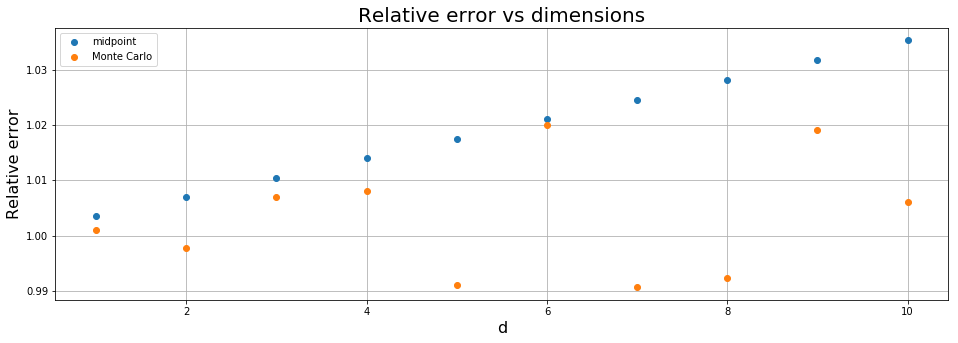

In [16]:
# Plot relative error vs dimensions
fig1 = plt.subplots(figsize=[16,5])

plt.plot(ds, outMp[0], 'o', label='midpoint')
plt.plot(ds, outMc[0], 'o', label='Monte Carlo')
plt.title('Relative error vs dimensions', fontsize = 20)
plt.xlabel('d', fontsize = 16)
plt.ylabel('Relative error', fontsize = 16)
plt.grid()
plt.legend()

plt.show()

We can notice that for the midpoint method the relative error is monotonically increasing as the dimension increases: this is probably due to a sistematic excess/truncation error, since from the theory we know that the error should scale with 1/n, which in our case is kept fixed. Instead for the Monte Carlo integrator the relative error is fluctuating around 0 and the magnitude is almost the same, as we can expected from the theory since it should scale as 1/N.